# 추출한 Feature 정형화

In [3]:
import os
import pandas as pd

OUTPUT_DIR = '/data/outputs'

In [4]:
df = pd.read_csv('./csv/pdf_samples_20210817.csv')

In [5]:
feature_paths = []
for sha256 in df['sha256']:
    f_path = os.path.join(OUTPUT_DIR, sha256 + '.pikepdf.parser.feature')
    if not os.path.isfile(f_path):
        continue
        
    feature_paths.append(f_path)

In [6]:
len(feature_paths)

10628

In [7]:
feature_paths[:5]

['/data/outputs/4230b3173f38f899580f3c36ad80509e2490d0df924bbf4bf88b34d06cc7debc.pikepdf.parser.feature',
 '/data/outputs/4239d74db15848d1efa5c62c490910c7657898888f081cf10756cb74ef9ed329.pikepdf.parser.feature',
 '/data/outputs/423f699b6a23bfee35a4d0633c507939a9025b71acc52c97661a7f2a4cf95563.pikepdf.parser.feature',
 '/data/outputs/438dc2373e1f00304f04addee406e2a7eb06d7a129bef2740811f54158bcad30.pikepdf.parser.feature',
 '/data/outputs/4394951b6d67894924307f0d58761a7b8150950e8f7a44ad9fca9169cbe99be3.pikepdf.parser.feature']

In [8]:
dfs = [pd.read_csv(feature_path) for feature_path in feature_paths]

In [28]:
merge_df = pd.concat(dfs)

In [10]:
merge_df[:5]

,Unnamed: 0,pikepdf_filename,pikepdf_Size,pikepdf_infolenth,pikepdf_PdfVersion,pikepdf_Pages,pikepdf_CreationDate,pikepdf_Title,pikepdf_ModDate,pikepdf_Producer,...,pikepdf_MSIP_Label_bff60613-a741-4790-ba46-c6813ca61c58_SiteId,pikepdf_MSIP_Label_bff60613-a741-4790-ba46-c6813ca61c58_Name,pikepdf_DocName,pikepdf_MSIP_Label_bff60613-a741-4790-ba46-c6813ca61c58_SetDate,pikepdf_IsHeaderConverted,pikepdf_CustomDeclaration,pikepdf__EmailStoreID,pikepdf__TentativeReviewCycleID,pikepdf_MSIP_Label_bff60613-a741-4790-ba46-c6813ca61c58_Extended_MSFT_Method,pikepdf_MSIP_Label_bff60613-a741-4790-ba46-c6813ca61c58_Owner
0,0,4230b3173f38f899580f3c36ad80509e2490d0df924bbf...,36,4,1.4,2.0,20190522153315+01'00',))> PDF I Left My Brains in San Francisco by K...,20190522153315+01'00',mPDF 5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,4239d74db15848d1efa5c62c490910c7657898888f081c...,36,4,1.4,2.0,20200321154733+00'00',))> PDF meet mrs smith my adventures with six ...,20200321154733+00'00',mPDF 5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,423f699b6a23bfee35a4d0633c507939a9025b71acc52c...,69,7,1.7,3.0,D:20190530193156+03'00',"Elements Of Writing, Revised Edition, 5th Cou...",D:20190530193156+03'00',dvipdfmx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,438dc2373e1f00304f04addee406e2a7eb06d7a129bef2...,994,3,1.4,83.0,D:20150421140517+09'00',NaN,D:20150421140517+09'00',iTextSharp 4.1.6 by 1T3XT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,4394951b6d67894924307f0d58761a7b8150950e8f7a44...,70,7,1.7,3.0,D:20190731022606+03'00',Key West Takedown By Al Lamanda,D:20190731022606+03'00',Acrobat Distiller 8.1.0 (Windows),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
merge_df.columns

Index(['Unnamed: 0', 'pikepdf_filename', 'pikepdf_Size', 'pikepdf_infolenth',
       'pikepdf_PdfVersion', 'pikepdf_Pages', 'pikepdf_CreationDate',
       'pikepdf_Title', 'pikepdf_ModDate', 'pikepdf_Producer',
       ...
       'pikepdf_MSIP_Label_bff60613-a741-4790-ba46-c6813ca61c58_SiteId',
       'pikepdf_MSIP_Label_bff60613-a741-4790-ba46-c6813ca61c58_Name',
       'pikepdf_DocName',
       'pikepdf_MSIP_Label_bff60613-a741-4790-ba46-c6813ca61c58_SetDate',
       'pikepdf_IsHeaderConverted', 'pikepdf_CustomDeclaration',
       'pikepdf__EmailStoreID', 'pikepdf__TentativeReviewCycleID',
       'pikepdf_MSIP_Label_bff60613-a741-4790-ba46-c6813ca61c58_Extended_MSFT_Method',
       'pikepdf_MSIP_Label_bff60613-a741-4790-ba46-c6813ca61c58_Owner'],
      dtype='object', length=555)

# Tensorflow Data Validation

In [ ]:
!pip3 install tensorflow

In [ ]:
!pip install tensorflow-data-validation

In [29]:
import tensorflow_data_validation as tfdv

In [30]:
merge_df = merge_df.drop('Unnamed: 0', axis=1)

In [31]:
for i in range(0, len(merge_df.columns)):
    merge_df[merge_df.columns[i]] = merge_df[merge_df.columns[i]].astype(str)

In [32]:
stats = tfdv.generate_statistics_from_dataframe(merge_df)

In [33]:
tfdv.visualize_statistics(stats)

# nan값이 많은 feature 제외하고 feature selection

In [290]:
selected_df = merge_df[['pikepdf_filename','pikepdf_Author','pikepdf__Author','pikepdf_Author Name','pikepdf_AXPAuthor','pikepdf_AuthorName','pikepdf_Size', 'pikepdf_infolenth', 'pikepdf_PdfVersion', 'pikepdf_Pages', 'pikepdf_Producer', 'pikepdf_len_ExtGState', 'pikepdf_len_Font', 'pikepdf_len_ProcSet', 'pikepdf_Contents_Length', 'pikepdf_Creator', 'pikepdf_Keywords', 'pikepdf_len_XObject', 'pikepdf_Subject', 'pikepdf_SourceModified', 'pikepdf_Company', 'pikepdf_len_ColorSpace', 'pikepdf_len_Pattern', 'pikepdf_len_Properties', 'pikepdf_ContentTypeId', 'pikepdf_Comments', 'pikepdf_len_Shading', 'pikepdf_doi', 'pikepdf_CreationDate--Text', 'pikepdf_TimeStamp', 'pikepdf_PTEX.Fullbanner', 'pikepdf__AuthorEmail', 'pikepdf__EmailSubject', 'pikepdf__AdHocReviewCycleID', 'pikepdf__AuthorEmailDisplayName', 'pikepdf_Created', 'pikepdf_LastSaved', 'pikepdf_Copyright', 'pikepdf_Category', 'pikepdf_Version', 'pikepdf_PDFVersion']]

In [291]:
selected_df = selected_df.reset_index()

In [292]:
selected_df = selected_df.drop('index', axis=1)

In [294]:
selected_df = selected_df.astype({'pikepdf_len_ProcSet': float, 'pikepdf_len_ExtGState': float, 'pikepdf_len_Font': float, 'pikepdf_Contents_Length': float, 'pikepdf_len_XObject': float
                                   , 'pikepdf_len_ColorSpace': float, 'pikepdf_len_Pattern': float, 'pikepdf_len_Properties': float, 'pikepdf_len_Shading': float, 'pikepdf_Pages': float})

In [295]:
selected_df

,pikepdf_filename,pikepdf_Author,pikepdf__Author,pikepdf_Author Name,pikepdf_AXPAuthor,pikepdf_AuthorName,pikepdf_Size,pikepdf_infolenth,pikepdf_PdfVersion,pikepdf_Pages,...,pikepdf__AuthorEmail,pikepdf__EmailSubject,pikepdf__AdHocReviewCycleID,pikepdf__AuthorEmailDisplayName,pikepdf_Created,pikepdf_LastSaved,pikepdf_Copyright,pikepdf_Category,pikepdf_Version,pikepdf_PDFVersion
0,4230b3173f38f899580f3c36ad80509e2490d0df924bbf...,nan,nan,nan,nan,nan,36,4,1.4,2.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,4239d74db15848d1efa5c62c490910c7657898888f081c...,nan,nan,nan,nan,nan,36,4,1.4,2.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,423f699b6a23bfee35a4d0633c507939a9025b71acc52c...,nan,nan,nan,nan,nan,69,7,1.7,3.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,438dc2373e1f00304f04addee406e2a7eb06d7a129bef2...,nan,nan,nan,nan,nan,994,3,1.4,83.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,4394951b6d67894924307f0d58761a7b8150950e8f7a44...,nan,nan,nan,nan,nan,70,7,1.7,3.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10631,31ebb5bb34013953c4acf27e02cfe9115494989b4678cc...,Banofu Wupeje,nan,nan,nan,nan,60,6,1.4,3.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10632,6ef0085e691ad8e0620679e98d48a662ea3ce41a3099f0...,Bazecurimo Xecono,nan,nan,nan,nan,58,6,1.4,3.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10633,406a86606df5f9629dd2c7b53ae622c300926c33ff31a9...,Susan McElrath,nan,nan,nan,nan,2896,6,1.5,60.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10634,dab6865c47dc77c7750c0c4de3ff21a2cae31f24b0be83...,Hucozo Fodapi,nan,nan,nan,nan,65,6,1.4,2.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Feature engineering

### 비슷한 이름의 feature들 값을 확인해보고 합치거나 필요없는건 삭제

In [296]:
pd.set_option('mode.chained_assignment',  None)

In [297]:
selected_df['pikepdf_AuthorName'].value_counts()

nan                    10635
Braun R C, Mallon J        1
Name: pikepdf_AuthorName, dtype: int64

In [298]:
selected_df.loc[selected_df['pikepdf_AuthorName'] == 'Braun R C, Mallon J']

,pikepdf_filename,pikepdf_Author,pikepdf__Author,pikepdf_Author Name,pikepdf_AXPAuthor,pikepdf_AuthorName,pikepdf_Size,pikepdf_infolenth,pikepdf_PdfVersion,pikepdf_Pages,...,pikepdf__AuthorEmail,pikepdf__EmailSubject,pikepdf__AdHocReviewCycleID,pikepdf__AuthorEmailDisplayName,pikepdf_Created,pikepdf_LastSaved,pikepdf_Copyright,pikepdf_Category,pikepdf_Version,pikepdf_PDFVersion
2120,3c7a6316b011fdcf6d40c3f0f435589434ad2aa66661db...,0l1162,nan,nan,nan,"Braun R C, Mallon J",45,20,1.7,1.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [299]:
selected_df['pikepdf_Author'][7757] = 'Braun R C, Mallon J'

In [300]:
selected_df['pikepdf_Author'][7757]

'Braun R C, Mallon J'

In [301]:
selected_df = selected_df.drop(['pikepdf__Author','pikepdf_Author Name','pikepdf_AXPAuthor','pikepdf_AuthorName'], axis=1)

In [302]:
selected_df.head()

,pikepdf_filename,pikepdf_Author,pikepdf_Size,pikepdf_infolenth,pikepdf_PdfVersion,pikepdf_Pages,pikepdf_Producer,pikepdf_len_ExtGState,pikepdf_len_Font,pikepdf_len_ProcSet,...,pikepdf__AuthorEmail,pikepdf__EmailSubject,pikepdf__AdHocReviewCycleID,pikepdf__AuthorEmailDisplayName,pikepdf_Created,pikepdf_LastSaved,pikepdf_Copyright,pikepdf_Category,pikepdf_Version,pikepdf_PDFVersion
0,4230b3173f38f899580f3c36ad80509e2490d0df924bbf...,nan,36,4,1.4,2.0,mPDF 5.7,1.0,3.0,5.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,4239d74db15848d1efa5c62c490910c7657898888f081c...,nan,36,4,1.4,2.0,mPDF 5.7,1.0,3.0,5.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,423f699b6a23bfee35a4d0633c507939a9025b71acc52c...,nan,69,7,1.7,3.0,dvipdfmx,NaN,3.0,5.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,438dc2373e1f00304f04addee406e2a7eb06d7a129bef2...,nan,994,3,1.4,83.0,iTextSharp 4.1.6 by 1T3XT,NaN,4.0,5.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,4394951b6d67894924307f0d58761a7b8150950e8f7a44...,nan,70,7,1.7,3.0,Acrobat Distiller 8.1.0 (Windows),NaN,3.0,5.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [303]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10636 entries, 0 to 10635
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pikepdf_filename                 10636 non-null  object 
 1   pikepdf_Author                   10636 non-null  object 
 2   pikepdf_Size                     10636 non-null  object 
 3   pikepdf_infolenth                10636 non-null  object 
 4   pikepdf_PdfVersion               10636 non-null  object 
 5   pikepdf_Pages                    10634 non-null  float64
 6   pikepdf_Producer                 10636 non-null  object 
 7   pikepdf_len_ExtGState            6502 non-null   float64
 8   pikepdf_len_Font                 9752 non-null   float64
 9   pikepdf_len_ProcSet              8578 non-null   float64
 10  pikepdf_Contents_Length          7945 non-null   float64
 11  pikepdf_Creator                  10636 non-null  object 
 12  pikepdf_Keywords  

In [304]:
selected_df['pikepdf_PdfVersion'].value_counts()

1.4         4150
1.5         2200
1.7         1779
1.6         1218
1.3         1072
1.2          105
1.1           83
1.0           22
2.0            3
0.0            1
Soda PDF       1
nan            1
4736.0         1
Name: pikepdf_PdfVersion, dtype: int64

In [305]:
selected_df['pikepdf_Version'].value_counts()

nan                                                      10627
Version 2.10g - Licensed to Public Systems Associates        5
1                                                            1
1.2.0                                                        1
99022200                                                     1
Version 2.50 - Licensed to Final Draft, Inc.                 1
Name: pikepdf_Version, dtype: int64

In [306]:
selected_df['pikepdf_PDFVersion'].value_counts()

nan    10123
1.4      511
1.6        1
1.5        1
Name: pikepdf_PDFVersion, dtype: int64

In [307]:
PDF_df = selected_df.loc[selected_df['pikepdf_PDFVersion'] == '1.4']

In [308]:
PDF_df.loc[selected_df['pikepdf_PdfVersion'] != '1.4']

,pikepdf_filename,pikepdf_Author,pikepdf_Size,pikepdf_infolenth,pikepdf_PdfVersion,pikepdf_Pages,pikepdf_Producer,pikepdf_len_ExtGState,pikepdf_len_Font,pikepdf_len_ProcSet,...,pikepdf__AuthorEmail,pikepdf__EmailSubject,pikepdf__AdHocReviewCycleID,pikepdf__AuthorEmailDisplayName,pikepdf_Created,pikepdf_LastSaved,pikepdf_Copyright,pikepdf_Category,pikepdf_Version,pikepdf_PDFVersion
3844,28af329eb72415f104a3068812a5364607c09b38020c7d...,Kang,214,8,1.6,41.0,Hancom PDF 1.3.0.428,NaN,3.0,2.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.4
4406,050181c6fb7b563153d4a0524a2b41be46c9d58698ae2a...,Demo,4089,6,1.6,239.0,Hancom PDF 1.3.0.468,NaN,10.0,2.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.4
4757,24f249be272fb2fbfa221d2218c9e971d6cc9026099149...,admun,221,6,1.6,3.0,Hancom PDF 1.3.0.506,NaN,8.0,2.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.4
4859,2eb1e92dda9e6b0825923aa4b9666f11d16a61239fc81d...,user,549,7,1.6,91.0,Hancom PDF 1.3.0.498,NaN,5.0,2.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.4
6241,b595ba154408bb7912a99493d8dff411685a69ad086d49...,디자이너03,7290,7,1.5,98.0,Acrobat Distiller 11.0 (Windows),1.0,3.0,2.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.4
6769,1073b8478bd141443d175f510cfb5ea6c133de5315784e...,국회예산정책처,697,7,1.6,96.0,Hancom PDF 1.3.0.433,1.0,1.0,2.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.4
8216,9b8dc5bff88cb6a131987bfcb19268c4b84b10d2cf32ca...,1680,2040,7,1.5,42.0,Acrobat Distiller 9.0.0 (Windows),2.0,6.0,3.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.4
8478,07399133fd4ab0d673dad8d034ca32e788a9e2e635f51d...,admun,106,6,1.6,1.0,Hancom PDF 1.3.0.506,NaN,6.0,2.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.4
8612,326a50a3c6972f79e0b1219c432bd1579027cef24403ff...,nan,1960,7,1.6,74.0,MiramoPDF 1.5.0p12,106.0,7.0,4.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.4
9306,282ab0ef66452c9815a51789ea7cd355f466f774117a16...,인사이트플러스 함완식,133,6,1.6,5.0,Hancom PDF 1.3.0.477,NaN,1.0,4.0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.4


In [309]:
selected_df = selected_df.drop(['pikepdf_Version','pikepdf_PDFVersion'], axis=1)

In [355]:
selected_df['pikepdf_Creator']

0                                  NaN
1                                  NaN
2                                  TeX
3                                  NaN
4        Acrobat PDFMaker 8.1 for Word
                     ...              
10631                         SWFTools
10632                             QPDF
10633             Microsoft® Word 2016
10634                         pstoedit
10635                            Canva
Name: pikepdf_Creator, Length: 10636, dtype: object

### info() 함수에서 null값을 알기위해 'nan' 문자를 np.nan으로 변경

In [310]:
import numpy as np
selected_df = selected_df.replace('nan', np.nan)

In [311]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10636 entries, 0 to 10635
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pikepdf_filename                 10636 non-null  object 
 1   pikepdf_Author                   5826 non-null   object 
 2   pikepdf_Size                     10635 non-null  object 
 3   pikepdf_infolenth                10635 non-null  object 
 4   pikepdf_PdfVersion               10635 non-null  object 
 5   pikepdf_Pages                    10634 non-null  float64
 6   pikepdf_Producer                 9865 non-null   object 
 7   pikepdf_len_ExtGState            6502 non-null   float64
 8   pikepdf_len_Font                 9752 non-null   float64
 9   pikepdf_len_ProcSet              8578 non-null   float64
 10  pikepdf_Contents_Length          7945 non-null   float64
 11  pikepdf_Creator                  8661 non-null   object 
 12  pikepdf_Keywords  

### nan 값이 너무 많은 feature들 제외하고 dataframe 생성

In [313]:
selected_df2 = selected_df[['pikepdf_filename','pikepdf_Author','pikepdf_Size', 'pikepdf_infolenth', 'pikepdf_PdfVersion', 'pikepdf_Pages', 'pikepdf_Producer', 'pikepdf_len_ExtGState', 'pikepdf_len_Font', 'pikepdf_len_ProcSet', 'pikepdf_Contents_Length','pikepdf_Creator', 'pikepdf_len_XObject', 'pikepdf_len_ColorSpace']]

In [314]:
selected_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10636 entries, 0 to 10635
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pikepdf_filename         10636 non-null  object 
 1   pikepdf_Author           5826 non-null   object 
 2   pikepdf_Size             10635 non-null  object 
 3   pikepdf_infolenth        10635 non-null  object 
 4   pikepdf_PdfVersion       10635 non-null  object 
 5   pikepdf_Pages            10634 non-null  float64
 6   pikepdf_Producer         9865 non-null   object 
 7   pikepdf_len_ExtGState    6502 non-null   float64
 8   pikepdf_len_Font         9752 non-null   float64
 9   pikepdf_len_ProcSet      8578 non-null   float64
 10  pikepdf_Contents_Length  7945 non-null   float64
 11  pikepdf_Creator          8661 non-null   object 
 12  pikepdf_len_XObject      8477 non-null   float64
 13  pikepdf_len_ColorSpace   4152 non-null   float64
dtypes: float64(7), object(

### feature들마다 이상한 값들을 발견. 길이 같은 숫자데이터는 이상데이터를 nan값과 함께 0 으로 변경.

In [315]:
selected_df2['pikepdf_infolenth'].value_counts()

6                                     3260
5                                     1845
7                                     1559
4                                     1435
8                                      673
3                                      442
0                                      341
2                                      232
9                                      219
10                                     206
11                                     162
1                                      137
12                                      33
13                                      21
14                                      20
18                                       7
15                                       6
16                                       5
20                                       5
17                                       3
31                                       3
21                                       3
26                                       3
28         

In [316]:
selected_df2['pikepdf_infolenth'] = selected_df2[['pikepdf_infolenth']].replace(np.nan, 0)
selected_df2['pikepdf_Size'] = selected_df2['pikepdf_Size'].replace(np.nan, 0)
selected_df2['pikepdf_Pages'] = selected_df2['pikepdf_Pages'].replace(np.nan, 0)
selected_df2['pikepdf_len_ExtGState'] = selected_df2['pikepdf_len_ExtGState'].replace(np.nan, 0)
selected_df2['pikepdf_len_Font'] = selected_df2['pikepdf_len_Font'].replace(np.nan,0)
selected_df2['pikepdf_len_ProcSet'] = selected_df2['pikepdf_len_ProcSet'].replace(np.nan, 0)
selected_df2['pikepdf_Contents_Length'] = selected_df2['pikepdf_Contents_Length'].replace(np.nan, 0)
selected_df2['pikepdf_len_XObject'] = selected_df2['pikepdf_len_XObject'].replace(np.nan, 0)
selected_df2['pikepdf_len_ColorSpace'] = selected_df2['pikepdf_len_ColorSpace'].replace(np.nan, 0)

In [317]:
selected_df2['pikepdf_infolenth'][1660] = 0 # XšMä¶¦i[@-ª4”ÙhWû8ü[6®®…
selected_df2['pikepdf_infolenth'][1716] = 0 # �ÒŒ«y)ùå13·ì.þÖŠ©°À:ì[Ù|Öâ
selected_df2['pikepdf_infolenth'][2837] = 0 # Soda PDF 
selected_df2['pikepdf_infolenth'][2675] = 0 # ,“\r�c«⁄âúÛ­úÊúI%íÓ‡Ä½î÷Á8É¢$'ï
selected_df2['pikepdf_infolenth'][3980] = 3 # 3.0
selected_df2['pikepdf_infolenth'][3982] = 3 # 3.0

In [318]:
selected_df2['pikepdf_Size'][1660] = 0
selected_df2['pikepdf_Size'][1716] = 0
selected_df2['pikepdf_Size'][2675] = 0
selected_df2['pikepdf_Size'][2837] = 0
selected_df2['pikepdf_Size'][3952] = 0
selected_df2['pikepdf_Size'][3980] = 38
selected_df2['pikepdf_Size'][3982] = 0

In [320]:
selected_df2 = selected_df2.astype({'pikepdf_Size': int, 'pikepdf_infolenth': int, 'pikepdf_Pages': int, 'pikepdf_len_ExtGState': int, 'pikepdf_len_Font': int
                                   , 'pikepdf_len_ProcSet': int, 'pikepdf_Contents_Length': int, 'pikepdf_len_XObject': int, 'pikepdf_len_ColorSpace': int
                                   , 'pikepdf_Author': str, 'pikepdf_PdfVersion': str, 'pikepdf_Producer':str, 'pikepdf_Creator':str})

### 문자열 feature들은 결측치를 'nan'으로 대체, 없는 것도 feature가 될 수 있을거라는 생각.

In [321]:
selected_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10636 entries, 0 to 10635
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pikepdf_filename         10636 non-null  object
 1   pikepdf_Author           10636 non-null  object
 2   pikepdf_Size             10636 non-null  int64 
 3   pikepdf_infolenth        10636 non-null  int64 
 4   pikepdf_PdfVersion       10636 non-null  object
 5   pikepdf_Pages            10636 non-null  int64 
 6   pikepdf_Producer         10636 non-null  object
 7   pikepdf_len_ExtGState    10636 non-null  int64 
 8   pikepdf_len_Font         10636 non-null  int64 
 9   pikepdf_len_ProcSet      10636 non-null  int64 
 10  pikepdf_Contents_Length  10636 non-null  int64 
 11  pikepdf_Creator          10636 non-null  object
 12  pikepdf_len_XObject      10636 non-null  int64 
 13  pikepdf_len_ColorSpace   10636 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1

In [322]:
selected_df2.fillna('nan', inplace=True)

In [323]:
selected_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10636 entries, 0 to 10635
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pikepdf_filename         10636 non-null  object
 1   pikepdf_Author           10636 non-null  object
 2   pikepdf_Size             10636 non-null  int64 
 3   pikepdf_infolenth        10636 non-null  int64 
 4   pikepdf_PdfVersion       10636 non-null  object
 5   pikepdf_Pages            10636 non-null  int64 
 6   pikepdf_Producer         10636 non-null  object
 7   pikepdf_len_ExtGState    10636 non-null  int64 
 8   pikepdf_len_Font         10636 non-null  int64 
 9   pikepdf_len_ProcSet      10636 non-null  int64 
 10  pikepdf_Contents_Length  10636 non-null  int64 
 11  pikepdf_Creator          10636 non-null  object
 12  pikepdf_len_XObject      10636 non-null  int64 
 13  pikepdf_len_ColorSpace   10636 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1

### Microsoft Word를 하나로 통일

In [324]:
select_Creator = selected_df2.loc[selected_df2['pikepdf_Creator'].str.contains('Microsoft® Word')]
select_Creator['pikepdf_Creator'] = 'Microsoft® Word'

In [325]:
selected_df3 = pd.merge(selected_df2,select_Creator['pikepdf_Creator'], left_index=True, right_index=True, how='left')

In [326]:
for i in range(0, len(selected_df3)):
    if selected_df3['pikepdf_Creator_y'][i] == 'Microsoft® Word':
        selected_df3['pikepdf_Creator_x'][i] = 'Microsoft® Word'

In [327]:
select_Producer = selected_df3.loc[selected_df3['pikepdf_Producer'].str.contains('Microsoft® Word')]
select_Producer['pikepdf_Producer'] = 'Microsoft® Word'

In [328]:
selected_df4 = pd.merge(selected_df3,select_Producer['pikepdf_Producer'], left_index=True, right_index=True, how='left')

In [329]:
for i in range(0, len(selected_df4)):
    if selected_df4['pikepdf_Producer_y'][i] == 'Microsoft® Word':
        selected_df4['pikepdf_Producer_x'][i] = 'Microsoft® Word'

In [330]:
selected_df4 = selected_df4.drop(['pikepdf_Creator_y','pikepdf_Producer_y'], axis=1)
selected_df4 = selected_df4.rename(columns = {'pikepdf_Creator_x': 'pikepdf_Creator', 'pikepdf_Producer_x':'pikepdf_Producer'})

In [331]:
selected_df4.corr()

,pikepdf_Size,pikepdf_infolenth,pikepdf_Pages,pikepdf_len_ExtGState,pikepdf_len_Font,pikepdf_len_ProcSet,pikepdf_Contents_Length,pikepdf_len_XObject,pikepdf_len_ColorSpace
pikepdf_Size,1.000000,0.067292,0.383158,0.058521,0.042643,0.025796,-0.002370,0.069161,0.028327
pikepdf_infolenth,0.067292,1.000000,0.047982,-0.006752,0.122127,0.002463,-0.011765,0.004606,0.007208
pikepdf_Pages,0.383158,0.047982,1.000000,0.007020,-0.003514,-0.023497,-0.004443,-0.002026,0.001711
pikepdf_len_ExtGState,0.058521,-0.006752,0.007020,1.000000,0.158489,-0.024613,0.045411,0.073091,0.014887
pikepdf_len_Font,0.042643,0.122127,-0.003514,0.158489,1.000000,0.134177,0.014403,0.003521,0.008874
pikepdf_len_ProcSet,0.025796,0.002463,-0.023497,-0.024613,0.134177,1.000000,0.002152,0.006328,-0.022281
pikepdf_Contents_Length,-0.002370,-0.011765,-0.004443,0.045411,0.014403,0.002152,1.000000,0.011401,0.001667
pikepdf_len_XObject,0.069161,0.004606,-0.002026,0.073091,0.003521,0.006328,0.011401,1.000000,0.161707
pikepdf_len_ColorSpace,0.028327,0.007208,0.001711,0.014887,0.008874,-0.022281,0.001667,0.161707,1.000000


# 타겟 feature 생성

In [261]:
df['tags'] = df['tags'].astype(str)

### 먼저 tags에 malicious가 있으면 1, benign이 있으면 0으로 정리

In [262]:
df['result']= '0'
for i in range(0, len(df)):
    if 'malicious' in df['tags'][i]:
        df['result'][i] = '1'
    elif 'benign' in df['tags'][i]:
        df['result'][i] = '0'
    else:
        df['result'][i] = np.nan

In [263]:
df.head()

,sha256,filetype,vt_total,vt_cache,vt_positives,tags,size,result
0,4230b3173f38f899580f3c36ad80509e2490d0df924bbf...,pdf,0.0,0.0,0.0,"2019.06_07_08, malicious","17,569",1
1,4239d74db15848d1efa5c62c490910c7657898888f081c...,pdf,0.0,0.0,0.0,"2020.03.25, vt, malicious","18,293",1
2,423f699b6a23bfee35a4d0633c507939a9025b71acc52c...,pdf,0.0,0.0,0.0,"2019.06, malicious","33,123",1
3,438dc2373e1f00304f04addee406e2a7eb06d7a129bef2...,pdf,0.0,0.0,0.0,"benign, 2020.07.15, vt","5,103,520",0
4,4394951b6d67894924307f0d58761a7b8150950e8f7a44...,pdf,0.0,0.0,0.0,"2019.06_07_08, malicious","33,691",1


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10916 entries, 0 to 10915
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sha256        10916 non-null  object 
 1   filetype      10916 non-null  object 
 2   vt_total      10685 non-null  float64
 3   vt_cache      10685 non-null  float64
 4   vt_positives  10685 non-null  float64
 5   tags          10916 non-null  object 
 6   size          10916 non-null  object 
 7   result        3788 non-null   object 
dtypes: float64(3), object(5)
memory usage: 682.4+ KB


In [265]:
df['result'].value_counts()

1    2458
0    1330
Name: result, dtype: int64

### result가 1이 아닌데(아직 악성으로 판별되지 않음) vt_positive가 0보다 크면(바이러스가 하나의 회사에서라도 진단됨) 1(malicious), 바이러스 조회(vt_cache)를 했으나 vt_positive에서 0이라면 0(benign)으로 진단.

In [266]:
for i in range(0, len(df)):
    if df['result'][i] != '1':
        if df['vt_positives'][i] > 0:
            df['result'][i] = '1'
        elif df['vt_cache'][i] > 0:
            if df['vt_positives'][i] == 0:
                df['result'][i] = '0'

In [358]:
df['result'].value_counts(normalize=True)

0    0.718203
1    0.281797
Name: result, dtype: float64

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10916 entries, 0 to 10915
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sha256        10916 non-null  object 
 1   filetype      10916 non-null  object 
 2   vt_total      10685 non-null  float64
 3   vt_cache      10685 non-null  float64
 4   vt_positives  10685 non-null  float64
 5   tags          10916 non-null  object 
 6   size          10916 non-null  object 
 7   result        10685 non-null  object 
dtypes: float64(3), object(5)
memory usage: 682.4+ KB


In [269]:
df

,sha256,filetype,vt_total,vt_cache,vt_positives,tags,size,result
0,4230b3173f38f899580f3c36ad80509e2490d0df924bbf...,pdf,0.0,0.0,0.0,"2019.06_07_08, malicious","17,569",1
1,4239d74db15848d1efa5c62c490910c7657898888f081c...,pdf,0.0,0.0,0.0,"2020.03.25, vt, malicious","18,293",1
2,423f699b6a23bfee35a4d0633c507939a9025b71acc52c...,pdf,0.0,0.0,0.0,"2019.06, malicious","33,123",1
3,438dc2373e1f00304f04addee406e2a7eb06d7a129bef2...,pdf,0.0,0.0,0.0,"benign, 2020.07.15, vt","5,103,520",0
4,4394951b6d67894924307f0d58761a7b8150950e8f7a44...,pdf,0.0,0.0,0.0,"2019.06_07_08, malicious","33,691",1
...,...,...,...,...,...,...,...,...
10911,d49bed3b5ea644831260ac01d9f46ca554eeed837844e0...,pdf,59.0,1.0,6.0,nan,"66,766",1
10912,d9ff1bef86420858171f2f739085af520fd347a8987a7e...,pdf,60.0,1.0,9.0,nan,"55,903",1
10913,dab6865c47dc77c7750c0c4de3ff21a2cae31f24b0be83...,pdf,60.0,1.0,9.0,nan,"86,822",1
10914,dd9a29fed08738c17eda1ac64f0649f266af9e4199e1e5...,pdf,60.0,1.0,7.0,nan,"68,190",1


In [332]:
selected_df4 = selected_df4.rename(columns = {'pikepdf_filename': 'sha256'})

### target 으로 쓸 result 컬럼과 기존 추출한 feature 들을 merge

In [333]:
pdf_df = pd.merge(selected_df4, df[['sha256','result']], on="sha256", how='left')

In [334]:
pdf_df = pdf_df.dropna(axis=0) #결측치 있는 행 모두 제거, result에서 tag가 없었던 행과, feature를 추출하지 못했던 파일들이 서로 다를 수 있어 merge하고 안맞는 것들은 결측치가 되었고 그 행을 모두 삭제시킴.

In [335]:
pdf_df['result'] = pdf_df['result'].astype(int)

In [336]:
pdf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10402 entries, 0 to 10635
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sha256                   10402 non-null  object
 1   pikepdf_Author           10402 non-null  object
 2   pikepdf_Size             10402 non-null  int64 
 3   pikepdf_infolenth        10402 non-null  int64 
 4   pikepdf_PdfVersion       10402 non-null  object
 5   pikepdf_Pages            10402 non-null  int64 
 6   pikepdf_Producer         10402 non-null  object
 7   pikepdf_len_ExtGState    10402 non-null  int64 
 8   pikepdf_len_Font         10402 non-null  int64 
 9   pikepdf_len_ProcSet      10402 non-null  int64 
 10  pikepdf_Contents_Length  10402 non-null  int64 
 11  pikepdf_Creator          10402 non-null  object
 12  pikepdf_len_XObject      10402 non-null  int64 
 13  pikepdf_len_ColorSpace   10402 non-null  int64 
 14  result                   10402 non-nul

In [337]:
pdf_df = pdf_df.reset_index()
pdf_df = pdf_df.drop(['sha256','index'], axis=1)

In [338]:
encoder = TargetEncoder()

In [339]:
pdf_df_encoded = encoder.fit_transform(pdf_df, pdf_df['result'])
pdf_df_encoded

/opt/conda/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,pikepdf_Author,pikepdf_Size,pikepdf_infolenth,pikepdf_PdfVersion,pikepdf_Pages,pikepdf_Producer,pikepdf_len_ExtGState,pikepdf_len_Font,pikepdf_len_ProcSet,pikepdf_Contents_Length,pikepdf_Creator,pikepdf_len_XObject,pikepdf_len_ColorSpace,result
0,0.410607,36,4,0.316478,2,0.983122,1,3,5,2412,0.466632,0,0,1
1,0.410607,36,4,0.316478,2,0.983122,1,3,5,2451,0.466632,0,0,1
2,0.410607,69,7,0.588542,3,0.914591,0,3,5,2115,0.400000,0,0,1
3,0.410607,994,3,0.316478,83,0.013445,0,4,5,66,0.466632,1,0,0
4,0.410607,70,7,0.588542,3,0.192982,0,3,5,2398,0.277778,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10397,0.283503,60,6,0.316478,3,0.486486,1,2,0,502,0.500000,0,3,1
10398,0.283503,58,6,0.316478,3,0.620690,1,2,0,501,0.676471,0,3,1
10399,0.283503,2896,6,0.101243,60,0.100000,2,2,5,1835,0.107311,1,0,0
10400,0.283503,65,6,0.316478,2,0.576923,1,2,0,541,0.633333,0,3,1


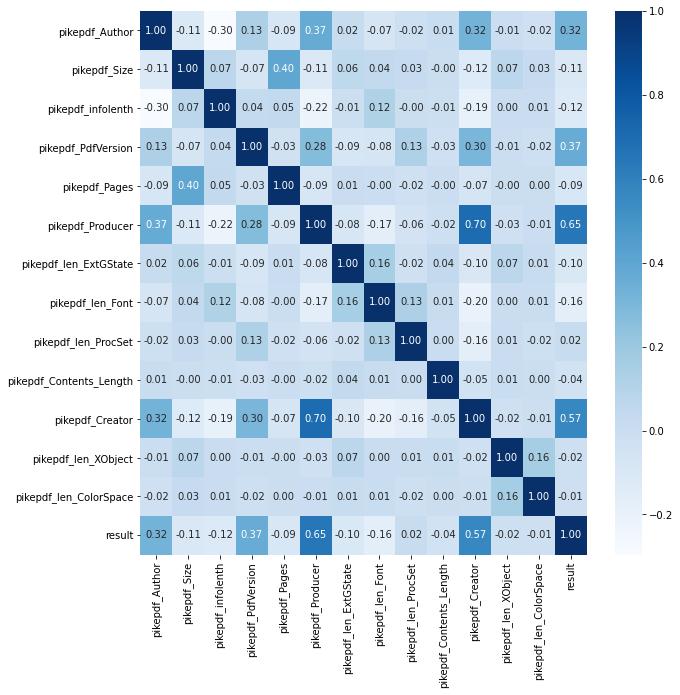

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

sns.heatmap(pdf_df_encoded.corr(), annot=True, fmt='.2f', cmap='Blues');

<AxesSubplot:xlabel='result', ylabel='pikepdf_Contents_Length'>

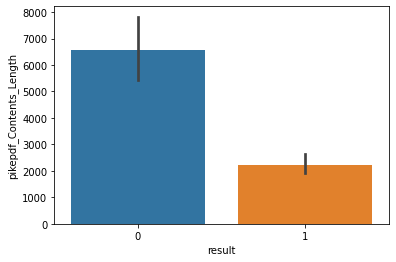

In [359]:
sns.barplot(x='result', y='pikepdf_Contents_Length', data=pdf_df_encoded)

<AxesSubplot:xlabel='result', ylabel='pikepdf_Size'>

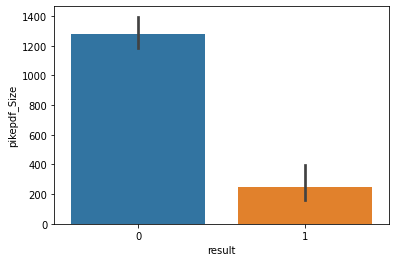

In [360]:
sns.barplot(x='result', y='pikepdf_Size', data=pdf_df_encoded)

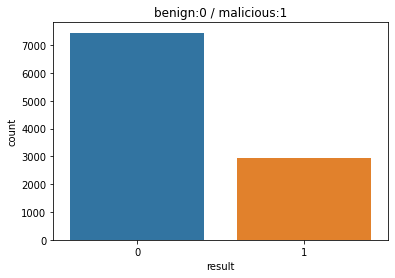

In [343]:
sns.countplot(x="result", data=pdf_df_encoded)
plt.title("benign:0 / malicious:1")
plt.show()

### 모델에 적용하기 위해 train test dataset 분리

In [344]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(pdf_df,test_size=0.2, random_state=2)
train, val = train_test_split(train,test_size=0.2, random_state=2)

In [345]:
train.shape, val.shape, test.shape

((6656, 14), (1665, 14), (2081, 14))

In [346]:
pdf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10402 entries, 0 to 10401
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pikepdf_Author           10402 non-null  object
 1   pikepdf_Size             10402 non-null  int64 
 2   pikepdf_infolenth        10402 non-null  int64 
 3   pikepdf_PdfVersion       10402 non-null  object
 4   pikepdf_Pages            10402 non-null  int64 
 5   pikepdf_Producer         10402 non-null  object
 6   pikepdf_len_ExtGState    10402 non-null  int64 
 7   pikepdf_len_Font         10402 non-null  int64 
 8   pikepdf_len_ProcSet      10402 non-null  int64 
 9   pikepdf_Contents_Length  10402 non-null  int64 
 10  pikepdf_Creator          10402 non-null  object
 11  pikepdf_len_XObject      10402 non-null  int64 
 12  pikepdf_len_ColorSpace   10402 non-null  int64 
 13  result                   10402 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 

In [ ]:
pip install --upgrade category_encoders

In [165]:
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [347]:
target = 'result'
X_train = train.drop(target, axis=1)
y_train = train[target]
X_val = val.drop(target, axis=1)
y_val = val[target]
X_test = test.drop(target, axis=1)
y_test = test[target]

### RandomForest 모델

In [348]:
pipe = make_pipeline(
    TargetEncoder(),
    MinMaxScaler(),
    RandomForestClassifier(n_jobs=-1, random_state=2, oob_score=True)
    )

pipe.fit(X_train, y_train)

print('train set 정확도: ', pipe.score(X_train, y_train))
print('val set 정확도: ', pipe.score(X_val, y_val))

y_train_pred = pipe.predict(X_train)
y_val_pred = pipe.predict(X_val)

print('train set f1_score:', f1_score(y_train,y_train_pred)) 
print('val set f1_score:', f1_score(y_val,y_val_pred))

/opt/conda/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


train set 정확도:  0.9918870192307693
val set 정확도:  0.9063063063063063
train set f1_score: 0.9856153436334576
val set f1_score: 0.8239277652370203


In [353]:
from sklearn.metrics import classification_report

print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, y_val_pred))

검증 정확도 0.9063063063063063
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1193
           1       0.88      0.77      0.82       472

    accuracy                           0.91      1665
   macro avg       0.90      0.87      0.88      1665
weighted avg       0.91      0.91      0.90      1665



In [288]:
pipe_random = make_pipeline(
      TargetEncoder()
    , MinMaxScaler()
    , RandomForestClassifier(n_jobs=-1, random_state=2, oob_score=True)
)

dists = {
    'randomforestclassifier__min_samples_leaf': randint(1, 7),     
    'randomforestclassifier__n_estimators': randint(100, 500), 
    'randomforestclassifier__max_depth': [15, 20, 25, 30, None], 
    'randomforestclassifier__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe_random, 
    param_distributions=dists, 
    n_iter=30, 
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/opt/conda/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 0.28803653048582223, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__n_estimators': 209}
MAE:  -0.8212331241810059


In [289]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

,21,9,16,10,7,11,1,28,29,5,...,27,4,14,2,0,18,8,19,25,12
mean_fit_time,3.945783,6.290684,4.309653,1.590132,4.67414,2.12186,9.26205,5.825092,6.569863,4.929575,...,13.563398,10.378932,3.055612,6.882413,6.646592,2.435647,3.336232,13.694949,12.14529,9.624236
std_fit_time,0.02259,0.109538,0.137094,0.023533,0.045339,0.094751,0.081035,0.076155,0.343566,0.141592,...,0.217558,0.138332,0.041695,0.224355,0.190599,0.172332,0.179779,0.697593,0.297881,0.240534
mean_score_time,0.30741,0.542205,0.49854,0.178048,0.344163,0.235625,0.64704,0.458767,0.397318,0.588638,...,0.590146,0.560787,0.181925,0.343098,0.345449,0.191769,0.185472,0.597064,0.5493,0.421381
std_score_time,0.001957,0.020946,0.039129,0.01578,0.022658,0.001737,0.0272,0.029732,0.130186,0.053775,...,0.042854,0.041749,0.022975,0.014866,0.025267,0.011469,0.034287,0.008696,0.026092,0.012816
param_randomforestclassifier__max_depth,20,20,20,None,25,None,None,20,None,30,...,20,30,20,15,15,15,20,20,None,15
param_randomforestclassifier__max_features,0.288037,0.277609,0.051744,0.086405,0.287291,0.036027,0.420891,0.328741,0.37845,0.076613,...,0.774701,0.552914,0.510614,0.732641,0.607352,0.540719,0.763972,0.758307,0.901806,0.777363
param_randomforestclassifier__min_samples_leaf,3,3,1,3,6,3,4,5,4,1,...,3,1,1,4,1,6,5,1,5,1
param_randomforestclassifier__n_estimators,209,385,315,107,265,157,472,322,342,375,...,443,408,112,229,242,102,110,440,374,316
params,"{'randomforestclassifier__max_depth': 20, 'ran...","{'randomforestclassifier__max_depth': 20, 'ran...","{'randomforestclassifier__max_depth': 20, 'ran...","{'randomforestclassifier__max_depth': None, 'r...","{'randomforestclassifier__max_depth': 25, 'ran...","{'randomforestclassifier__max_depth': None, 'r...","{'randomforestclassifier__max_depth': None, 'r...","{'randomforestclassifier__max_depth': 20, 'ran...","{'randomforestclassifier__max_depth': None, 'r...","{'randomforestclassifier__max_depth': 30, 'ran...",...,"{'randomforestclassifier__max_depth': 20, 'ran...","{'randomforestclassifier__max_depth': 30, 'ran...","{'randomforestclassifier__max_depth': 20, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 20, 'ran...","{'randomforestclassifier__max_depth': 20, 'ran...","{'randomforestclassifier__max_depth': None, 'r...","{'randomforestclassifier__max_depth': 15, 'ran..."
split0_test_score,0.824869,0.825592,0.81913,0.826873,0.820557,0.823123,0.824561,0.820018,0.824561,0.816609,...,0.8223,0.817241,0.813793,0.818103,0.815652,0.815789,0.818898,0.811419,0.820018,0.813206


In [174]:
from sklearn.metrics import classification_report

pipe_random = clf.best_estimator_
y_pred_random = pipe_random.predict(X_val)
y_pred_proba_random = pipe_random.predict_proba(X_val)[:,1]
print(classification_report(y_val, y_pred_random))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1193
           1       0.89      0.78      0.84       472

    accuracy                           0.91      1665
   macro avg       0.91      0.87      0.89      1665
weighted avg       0.91      0.91      0.91      1665



### XGboost 모델

In [102]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [103]:
from xgboost import XGBClassifier

In [167]:
pipe_xgb = make_pipeline(
    TargetEncoder(),
    MinMaxScaler(),
    XGBClassifier(n_jobs=-1, random_state=2)
    )

pipe_xgb.fit(X_train, y_train)

print('train set 정확도: ', pipe_xgb.score(X_train, y_train))
print('val set 정확도: ', pipe_xgb.score(X_val, y_val))

y_train_pred = pipe_xgb.predict(X_train)
y_val_pred = pipe_xgb.predict(X_val)

print('train set f1_score:', f1_score(y_train,y_train_pred)) 
print('val set f1_score:', f1_score(y_val,y_val_pred))

/opt/conda/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:53:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train set 정확도:  0.9652944711538461
val set 정확도:  0.9045045045045045
train set f1_score: 0.9372111986952977
val set f1_score: 0.8215488215488216


In [112]:
from sklearn.metrics import classification_report

print('검증 정확도', pipe_xgb.score(X_val, y_val))

print(classification_report(y_val, y_val_pred))

검증 정확도 0.9045045045045045
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1193
           1       0.87      0.78      0.82       472

    accuracy                           0.90      1665
   macro avg       0.89      0.87      0.88      1665
weighted avg       0.90      0.90      0.90      1665



### SVM

In [113]:
from sklearn import svm

In [168]:
pipe_svm = make_pipeline(
    TargetEncoder(),
    MinMaxScaler(),
    svm.SVC(kernel='rbf', gamma=0.7, max_iter=10000)
    )

pipe_svm.fit(X_train, y_train)

print('train set 정확도: ', pipe_svm.score(X_train, y_train))
print('val set 정확도: ', pipe_svm.score(X_val, y_val))

y_train_pred = pipe_svm.predict(X_train)
y_val_pred = pipe_svm.predict(X_val)

print('train set f1_score:', f1_score(y_train,y_train_pred)) 
print('val set f1_score:', f1_score(y_val,y_val_pred))

/opt/conda/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


train set 정확도:  0.8826622596153846
val set 정확도:  0.8738738738738738
train set f1_score: 0.7922319765895185
val set f1_score: 0.777542372881356


In [116]:
from sklearn.metrics import classification_report

print('검증 정확도', pipe_svm.score(X_val, y_val))

print(classification_report(y_val, y_val_pred))

검증 정확도 0.8948948948948949
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1193
           1       0.85      0.76      0.80       472

    accuracy                           0.89      1665
   macro avg       0.88      0.85      0.87      1665
weighted avg       0.89      0.89      0.89      1665



In [169]:
pipe_svm2 = make_pipeline(
    TargetEncoder(),
    MinMaxScaler(),
    svm.SVC(kernel='poly', gamma='auto', degree=3, C=1)
    )

pipe_svm2.fit(X_train, y_train)

print('train set 정확도: ', pipe_svm2.score(X_train, y_train))
print('val set 정확도: ', pipe_svm2.score(X_val, y_val))

y_train_pred = pipe_svm2.predict(X_train)
y_val_pred = pipe_svm2.predict(X_val)

print('train set f1_score:', f1_score(y_train,y_train_pred)) 
print('val set f1_score:', f1_score(y_val,y_val_pred))

/opt/conda/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


train set 정확도:  0.8240685096153846
val set 정확도:  0.8144144144144144
train set f1_score: 0.5609298837645293
val set f1_score: 0.5339366515837104


In [170]:
pipe_svm3 = make_pipeline(
    TargetEncoder(),
    MinMaxScaler(),
    svm.SVC(kernel='linear', C=1)
    )

pipe_svm3.fit(X_train, y_train)

print('train set 정확도: ', pipe_svm3.score(X_train, y_train))
print('val set 정확도: ', pipe_svm3.score(X_val, y_val))

y_train_pred = pipe_svm3.predict(X_train)
y_val_pred = pipe_svm3.predict(X_val)

print('train set f1_score:', f1_score(y_train,y_train_pred)) 
print('val set f1_score:', f1_score(y_val,y_val_pred))

/opt/conda/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


train set 정확도:  0.8500600961538461
val set 정확도:  0.8342342342342343
train set f1_score: 0.7132183908045978
val set f1_score: 0.6812933025404156


### 성능이 가장 좋은 모델 -> RandomForest

In [216]:
from sklearn.metrics import classification_report

pipe_random = clf.best_estimator_
y_pred_random = pipe_random.predict(X_test)
y_pred_proba_random = pipe_random.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1475
           1       0.91      0.80      0.85       606

    accuracy                           0.92      2081
   macro avg       0.91      0.88      0.90      2081
weighted avg       0.92      0.92      0.92      2081



In [220]:
from sklearn.metrics import roc_auc_score

y_pred_proba_random = pipe_random.predict_proba(X_test)[:, -1]
print('AUC score: ', roc_auc_score(y_test, y_pred_proba_random))

AUC score:  0.9408295575320244


Text(0, 0.5, 'TPR')

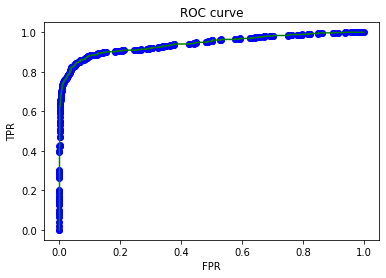

In [221]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_random)

plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [133]:
!pip install --upgrade pip

     |████████████████████████████████| 1.6 MB 1.8 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.1.2
    Uninstalling pip-21.1.2:
      Successfully uninstalled pip-21.1.2


In [184]:
pip install eli5

     |████████████████████████████████| 106 kB 1.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [185]:
import eli5
from eli5.sklearn import PermutationImportance

In [186]:
permuter = PermutationImportance(
    pipe_random.named_steps['randomforestclassifier'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state = 2
)

X_train_transformed = pipe_random['targetencoder'].transform(X_train)
X_train_transformed = pipe_random['minmaxscaler'].transform(X_train_transformed)

permuter.fit(X_train_transformed, y_train);

In [187]:
X_train_transformed = pd.DataFrame(X_train_transformed)

In [188]:
feature_names = X_train.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

pikepdf_len_ExtGState      0.004748
pikepdf_len_ColorSpace     0.005950
pikepdf_PdfVersion         0.009615
pikepdf_len_XObject        0.011959
pikepdf_infolenth          0.012079
pikepdf_Author             0.012770
pikepdf_len_ProcSet        0.012921
pikepdf_Pages              0.016977
pikepdf_len_Font           0.018299
pikepdf_Size               0.019291
pikepdf_Contents_Length    0.027103
pikepdf_Creator            0.028125
pikepdf_Producer           0.031370
dtype: float64

In [189]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0314 ± 0.0028,pikepdf_Producer
0.0281 ± 0.0032,pikepdf_Creator
0.0271 ± 0.0036,pikepdf_Contents_Length
0.0193 ± 0.0017,pikepdf_Size
0.0183 ± 0.0032,pikepdf_len_Font
0.0170 ± 0.0032,pikepdf_Pages
0.0129 ± 0.0014,pikepdf_len_ProcSet
0.0128 ± 0.0021,pikepdf_Author
0.0121 ± 0.0013,pikepdf_infolenth
0.0120 ± 0.0022,pikepdf_len_XObject


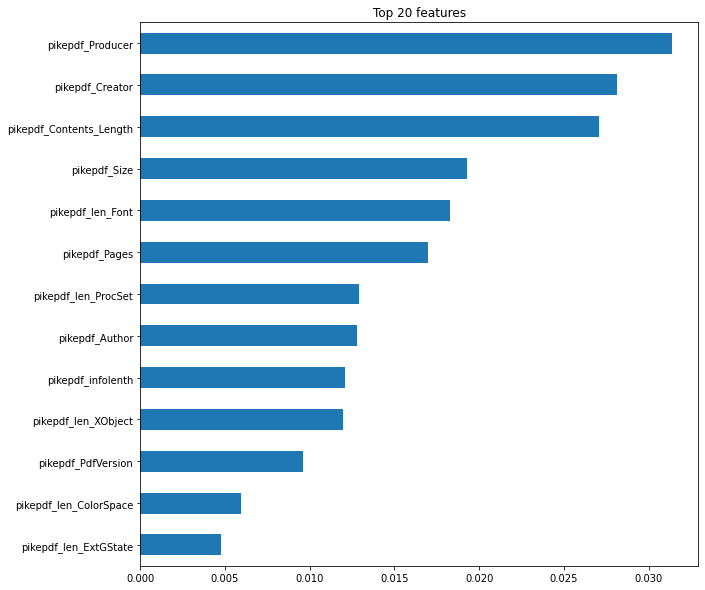

In [194]:
importances = pd.Series(permuter.feature_importances_, X_train.columns)
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();